# Data Importation

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.shape

(891, 12)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


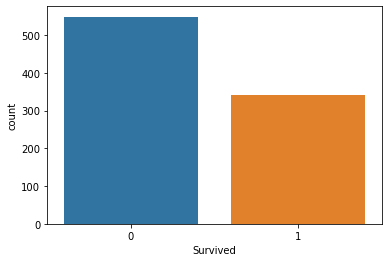

In [11]:
sns.countplot("Survived", data=df)

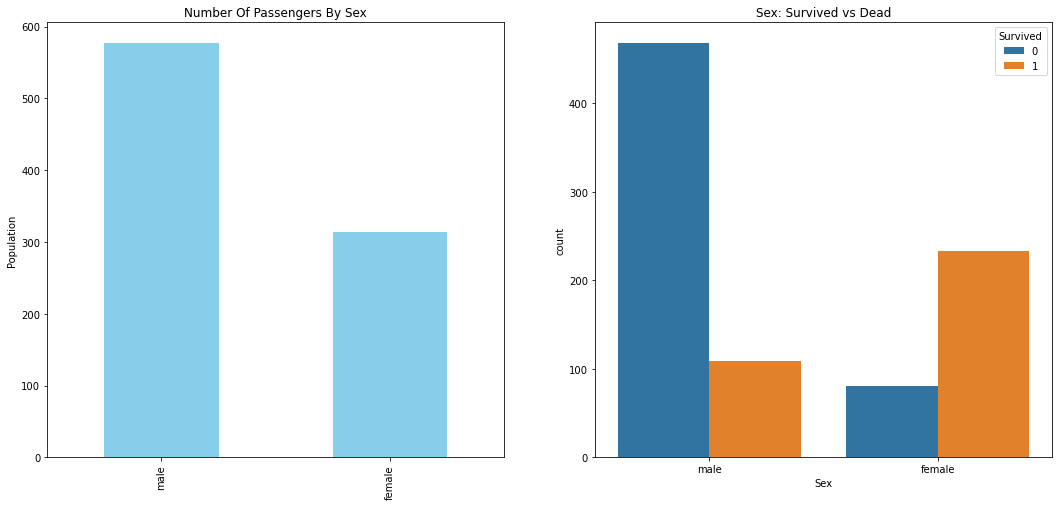

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
df["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
sns.countplot("Sex", hue = "Survived", data = df, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

In [16]:
pd.crosstab([df["Sex"], df["Survived"]], df["Pclass"], 
            margins = True).style.background_gradient(cmap = "summer_r")

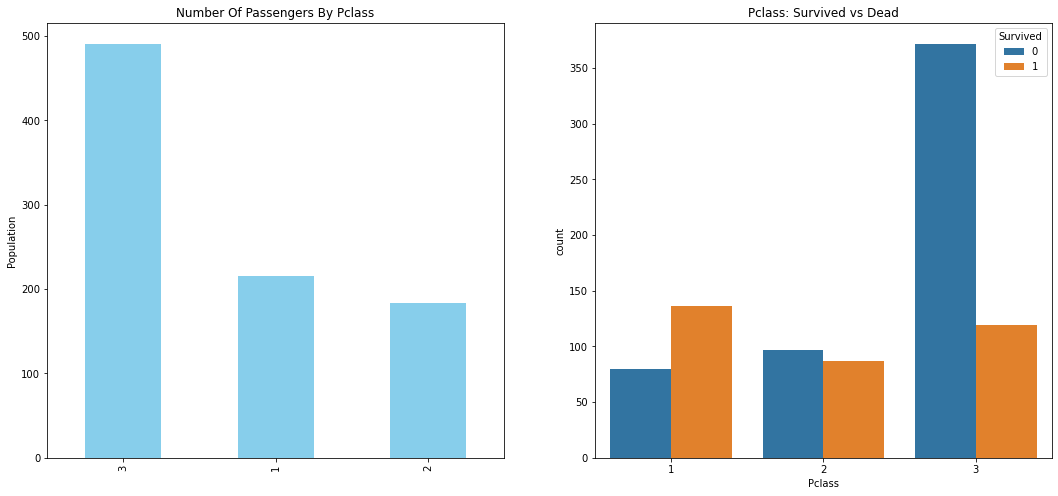

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
df["Pclass"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Population")
sns.countplot("Pclass", hue = "Survived", data = df, ax = ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

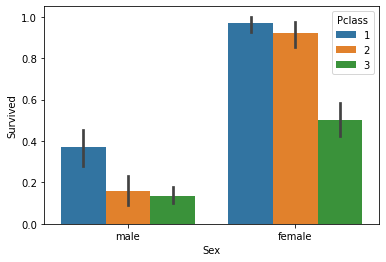

In [19]:
sns.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = df)
plt.show()

In [21]:
def get_title(data_frame):
    # Get names from data frame
    name_data = data_frame["Name"]
    
    # Obtain titles
    data_frame["Title"] = [name.split(", ", 1)[1].split(".", 1)[0] for name in name_data]
    
    # Find all titles
    titles = []
    for title in data_frame["Title"]:
        if title not in titles:
            titles.append(title)        
    
    return data_frame, titles

df, titles = get_title(df)
print(titles)

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']


In [23]:
pd.crosstab(df["Title"], df["Sex"]).T.style.background_gradient(cmap = "summer_r")


Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


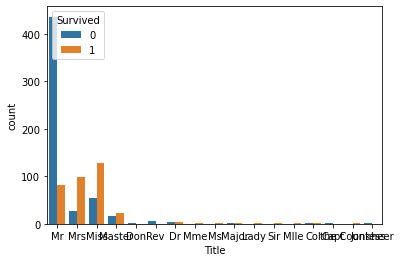

In [22]:
sns.countplot("Title", hue = "Survived", data = df)
plt.show()

In [24]:
def title2int(data):
    data["Title"].replace(["Major", "Capt", "Sir", "Dr", "Don", "Mlle", "Mme", "Ms", "Dona", "Lady", "the Countess", "Jonkheer", "Col", "Rev"],
                           ["Mr", "Mr", "Mr", "Mr", "Mr", "Miss", "Miss", "Miss", "Mrs", "Mrs", "Mrs", "Other", "Other", "Other"], inplace = True)
    data["Title"].replace(["Mr", "Miss", "Mrs", "Master", "Other"], [0, 1, 2, 3, 4], inplace = True)
    return data

df = title2int(df)


In [25]:
df.groupby("Title")["Age"].mean()


Title
0    32.739609
1    21.860000
2    35.981818
3     4.574167
4    45.888889
Name: Age, dtype: float64

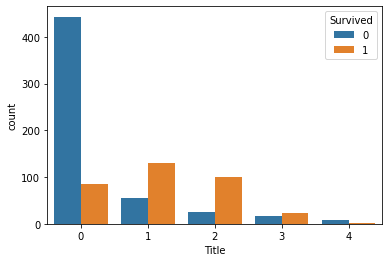

In [26]:
sns.countplot("Title", hue = "Survived", data = df)
plt.show()

In [27]:
pd.crosstab([df["Title"], df["Survived"]], df["Pclass"], margins = True).style.background_gradient(cmap = "summer_r")

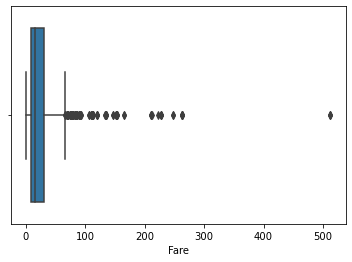

In [28]:
sns.boxplot(df["Fare"])
plt.show()

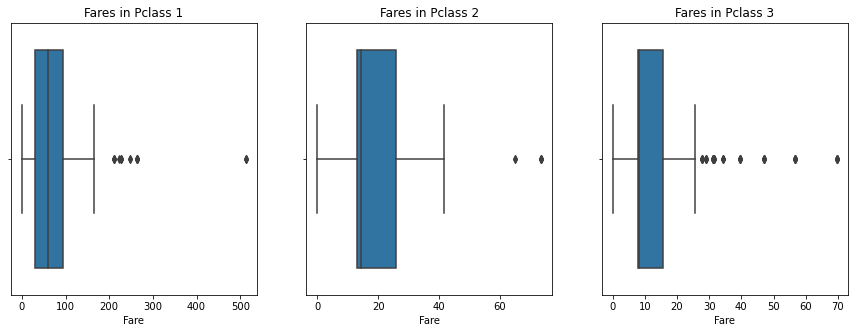

In [29]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.boxplot(df[df["Pclass"] == 1]["Fare"], ax = ax[0])
ax[0].set_title("Fares in Pclass 1")
sns.boxplot(df[df["Pclass"] == 2]["Fare"], ax = ax[1])
ax[1].set_title("Fares in Pclass 2")
sns.boxplot(df[df["Pclass"] == 3]["Fare"], ax = ax[2])
ax[2].set_title("Fares in Pclass 3")
plt.show()

In [30]:
df.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [31]:
df.groupby("Pclass")["Fare"].median()


Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [32]:
def fareG2int(data):
    data["Fare_group"] = "NaN"
    data.loc[data["Fare"] < 10, "Fare_group"] = 2 # class three
    data.loc[(data["Fare"] >= 10) & (data["Fare"] < 65), "Fare_group"] = 2 # class one and class two
    data.loc[data["Fare"] >= 65, "Fare_group"] = 1 # the patricians
    return data

In [33]:
df = fareG2int(df)

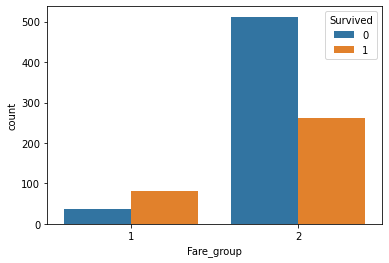

In [36]:
sns.countplot("Fare_group", hue = "Survived", data = df)
plt.show()

In [37]:
df["Embarked"] = df["Embarked"].fillna("S")

In [38]:
pd.crosstab([df["Embarked"], df["Survived"]], df["Sex"], margins = True).style.background_gradient(cmap = "summer_r")

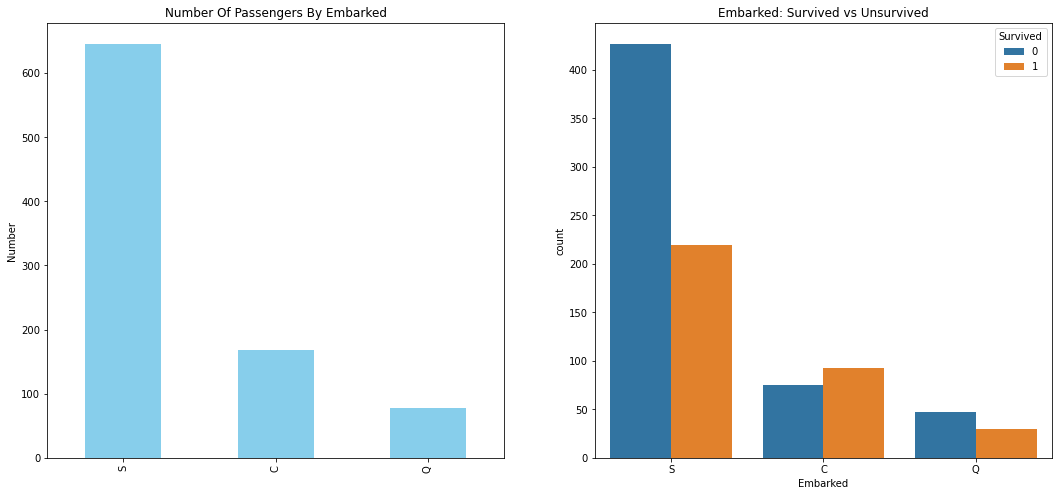

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
df["Embarked"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")
sns.countplot("Embarked", hue = "Survived", data = df, ax = ax[1])
ax[1].set_title("Embarked: Survived vs Unsurvived")
plt.show()

In [40]:
pd.crosstab([df["Embarked"], df["Survived"]], df["Pclass"], margins = True).style.background_gradient(cmap = "summer_r")

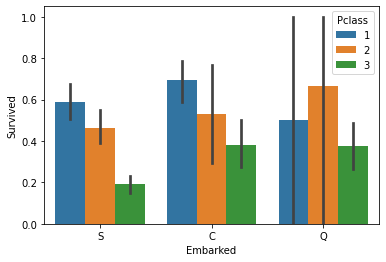

In [41]:
sns.barplot(x = "Embarked", y = "Survived", hue = "Pclass", data = df)
plt.show()

In [42]:
df["Embarked"].replace(["S", "Q", "C"], [0, 1, 2], inplace = True)

In [43]:
pd.crosstab([df["Pclass"], df["Survived"]], df["SibSp"], margins = True).style.background_gradient(cmap = "summer_r")

In [44]:
pd.crosstab([df["Pclass"], df["Survived"]], df["Parch"], margins = True).style.background_gradient(cmap = "summer_r")

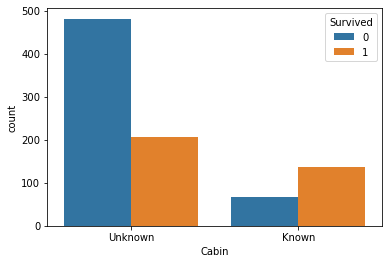

In [46]:
def Cabin_type(data):
    data.loc[data["Cabin"].notnull(), "Cabin"] = "Known"
    data.loc[data["Cabin"].isnull(), "Cabin"] = "Unknown"
    return data

df = Cabin_type(df)
sns.countplot("Cabin", hue = "Survived", data = df)
plt.show()

In [47]:
def cab2int(data):
    data.loc[data["Cabin"] == "Known", 'Cabin'] = 1
    data.loc[data["Cabin"] == "Unknown", 'Cabin'] = 0
    return data

df = cab2int(df)

In [48]:
df["Sex"].replace(["male", "female"], [0, 1], inplace = True)


In [51]:
from sklearn.ensemble import RandomForestRegressor

def assign_missing_ages(data_frame, features):
    age_data = data_frame[features]
    known_ages = age_data[age_data.Age.notnull()].values
    unknown_ages = age_data[age_data.Age.isnull()].values
    
    # Create target and eigenvalues for known ages
    target = known_ages[:, 0]
    eigen_val = known_ages[:, 1:]
    
    # apply random forest regressor
    rfr = RandomForestRegressor(random_state = 0, n_estimators = 2000, n_jobs = -1)
    rfr.fit(eigen_val, target)
    
    # predictions
    Age_predictions = rfr.predict(unknown_ages[:, 1::])
    data_frame.loc[(data_frame.Age.isnull()), "Age"] = Age_predictions
    
    return data_frame, rfr

age_features = ["Age", "Sex", "SibSp", "Parch", "Pclass"]
df, rfr = assign_missing_ages(df, age_features)
df["Age"] = df["Age"].astype(int)
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,1,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0,0,0,2
5,6,0,3,"Moran, Mr. James",0,29,0,0,330877,8.4583,0,1,0,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,1,0,0,2
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,0,0,3,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,0,0,2,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,0,2,2,2


In [53]:
df.groupby("Title")["Age"].mean()

Title
0    32.325142
1    21.741935
2    35.055118
3     5.300000
4    45.888889
Name: Age, dtype: float64

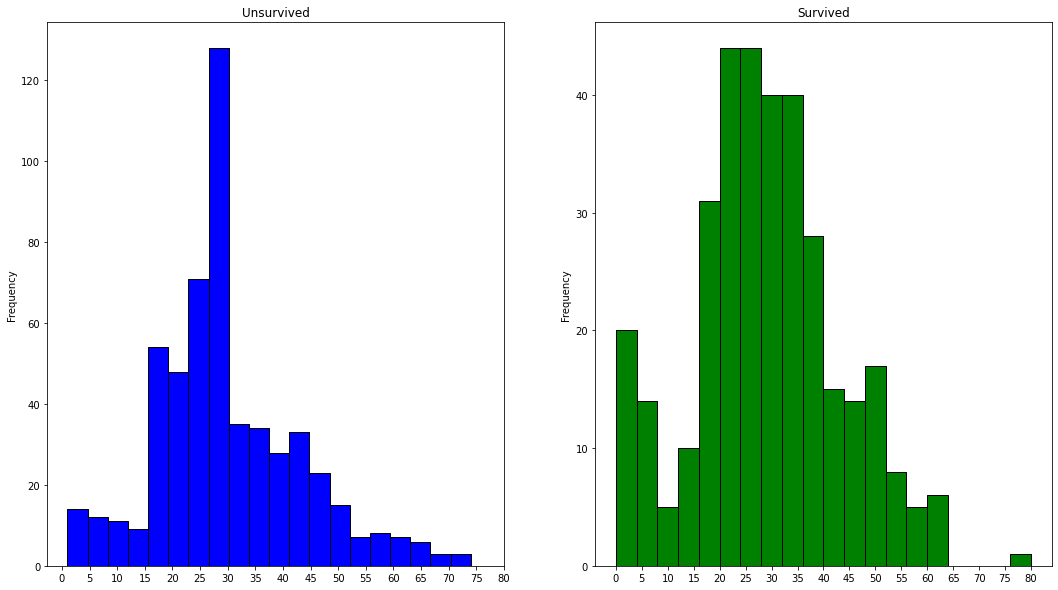

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))
df[df["Survived"] == 0]["Age"].plot.hist(ax = ax[0], bins = 20, edgecolor = "black", color = "blue")
ax[0].set_title("Unsurvived")
domain_1 = list(range(0, 85, 5))
ax[0].set_xticks(domain_1)
df[df["Survived"] == 1]["Age"].plot.hist(ax = ax[1], bins = 20, edgecolor = "black", color = "green")
ax[1].set_title("Survived")
domain_2 = list(range(0, 85, 5))
ax[1].set_xticks(domain_2)
plt.show()

In [57]:
def ageG2int(data):
    data["Age_group"] = "NaN"
    data.loc[data["Age"] <= 16, "Age_group"] = 0 # Child
    data.loc[(data["Age"] > 16) & (data["Age"] <= 32), "Age_group"] = 1 # young teen and teen adult
    data.loc[(data["Age"] > 32) & (data["Age"] <= 48), "Age_group"] = 3 # middle age
    data.loc[(data["Age"] > 48) & (data["Age"] <= 64), "Age_group"] = 4 # young elderly
    data.loc[data["Age"] > 64, "Age_group"] = 5 # elderly
    return data

df = ageG2int(df)

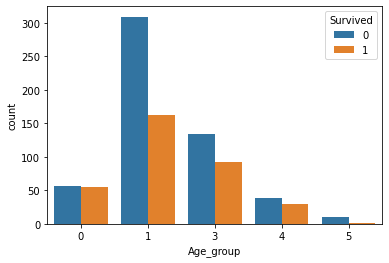

In [58]:
sns.countplot("Age_group", hue = "Survived", data = df)
plt.show()

In [59]:
pd.crosstab([df["Age_group"], df["Survived"]], df["Pclass"], margins = True).style.background_gradient(cmap = "summer_r")

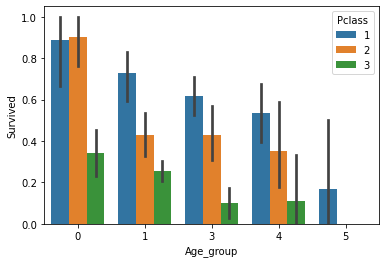

In [60]:
sns.barplot(x = "Age_group", y = "Survived", hue = "Pclass", data = df)
plt.show()

In [61]:
pd.crosstab([df["Age_group"], df["Survived"]], [df["Pclass"], df["Sex"]], margins = True).style.background_gradient(cmap = "summer_r")

In [62]:
def child2int(data):
    data["Child"] = "NaN"
    data.loc[data["Age"] <= 18, "Child"] = 0 # Child
    data.loc[data["Age"] > 18, "Child"] = 1 # Adult
    return data

df = child2int(df)

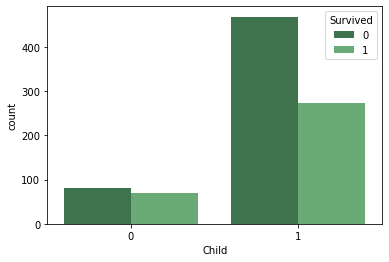

In [63]:
sns.countplot("Child", hue = "Survived", data = df, palette = "Greens_d")
plt.show()


In [64]:
df["FamSize"] = df["SibSp"] + df["Parch"] + 1

In [67]:
def famG2int(data):
    data["Fam_group"] = "NaN"
    data.loc[data["FamSize"] == 1, "Fam_group"] = 0 # Single
    data.loc[data["FamSize"] > 1, "Fam_group"] = 1 # Family
#     data.loc[data["FamSize"] == 2, "Fam_group"] = 1 # Couple
#     data.loc[(data["FamSize"] > 2) & (data["FamSize"] <= 4), "Fam_group"] = 2 # Medium Family
#     data.loc[data["FamSize"] > 4, "Fam_group"] = 3 # Big Family
    return data

df = famG2int(df)

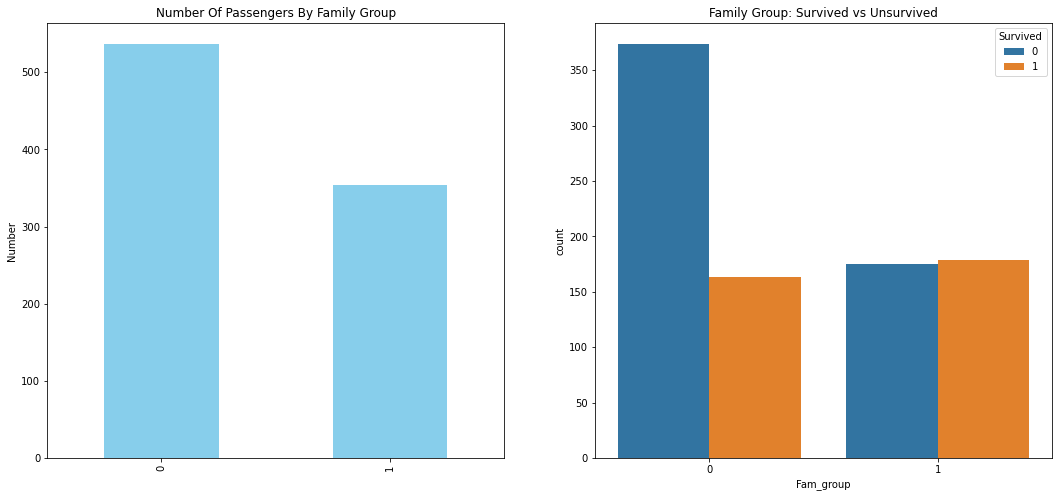

In [68]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
df["Fam_group"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Family Group")
ax[0].set_ylabel("Number")
sns.countplot("Fam_group", hue = "Survived", data = df, ax = ax[1])
ax[1].set_title("Family Group: Survived vs Unsurvived")
plt.show()

In [69]:
pd.crosstab([df["Fam_group"], df["Survived"]], df["Pclass"], margins = True).style.background_gradient(cmap = "summer_r")

In [70]:
df = df[:]


In [72]:
# Reordering columns
columns_titles = ["PassengerId", "Survived", "Pclass", "Title", "Sex", "Child", "Fam_group", "Fare", "Cabin", "Embarked"]
df = df[columns_titles]
df.head(10)

,PassengerId,Survived,Pclass,Title,Sex,Child,Fam_group,Fare,Cabin,Embarked
0,1,0,3,0,0,1,1,7.2500,0,0
1,2,1,1,2,1,1,1,71.2833,1,2
2,3,1,3,1,1,1,0,7.9250,0,0
3,4,1,1,2,1,1,1,53.1000,1,0
4,5,0,3,0,0,1,0,8.0500,0,0
5,6,0,3,0,0,1,0,8.4583,0,1
6,7,0,1,0,0,1,0,51.8625,1,0
7,8,0,3,3,0,0,1,21.0750,0,0
8,9,1,3,2,1,1,1,11.1333,0,0
9,10,1,2,2,1,0,1,30.0708,0,2
